<a href="https://colab.research.google.com/github/Bellahmer-hacene/data-science/blob/master/regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
https://www.kaggle.com/harlfoxem/housesalesprediction
# Description:

    id - Unique ID for each home sold
    date - Date of the home sale
    price - Price of each home sold
    bedrooms - Number of bedrooms
    bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
    sqft_living - Square footage of the apartments interior living space
    sqft_lot - Square footage of the land space
    floors - Number of floors
    waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
    view - An index from 0 to 4 of how good the view of the property was
    condition - An index from 1 to 5 on the condition of the apartment,
    grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
    sqft_above - The square footage of the interior housing space that is above ground level
    sqft_basement - The square footage of the interior housing space that is below ground level
    yr_built - The year the house was initially built
    yr_renovated - The year of the house’s last renovation
    zipcode - What zipcode area the house is in
    lat - Lattitude
    long - Longitude
    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [1]:
!wget https://raw.githubusercontent.com/Bellahmer-hacene/demo_git/master/kc_house_data.csv

--2020-04-04 15:04:28--  https://raw.githubusercontent.com/Bellahmer-hacene/demo_git/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2226636 (2.1M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.12M  10.1MB/s    in 0.2s    

2020-04-04 15:04:28 (10.1 MB/s) - ‘kc_house_data.csv’ saved [2226636/2226636]



In [2]:
!ls

kc_house_data.csv  sample_data


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
len(df)

21597

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#pas de données manquantes

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Trés peu de maison ayant un prix > 1 milion

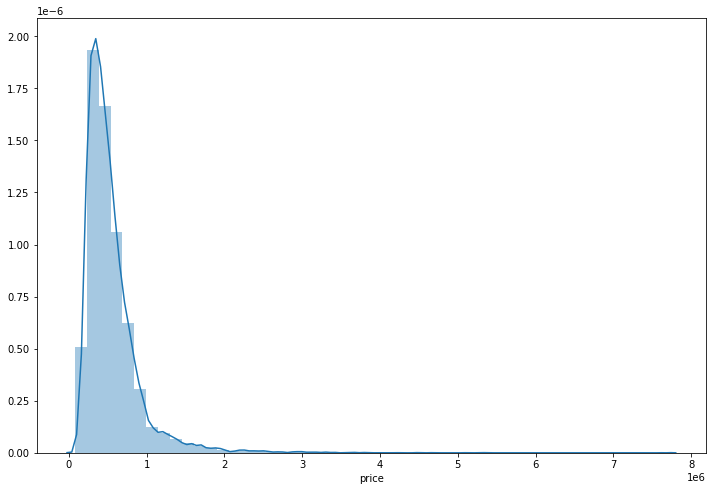

In [8]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

In [9]:
df.sort_values('price',ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [10]:
df['price'].median()

450000.0

In [11]:
df['price'].mean()

540296.5735055795

# supprimer 15% de la dataset (maison ayant un prix trop élevé)

In [12]:
len(df)*(0.15)

3239.5499999999997

In [0]:
df = df.sort_values('price',ascending=False).iloc[3240:]

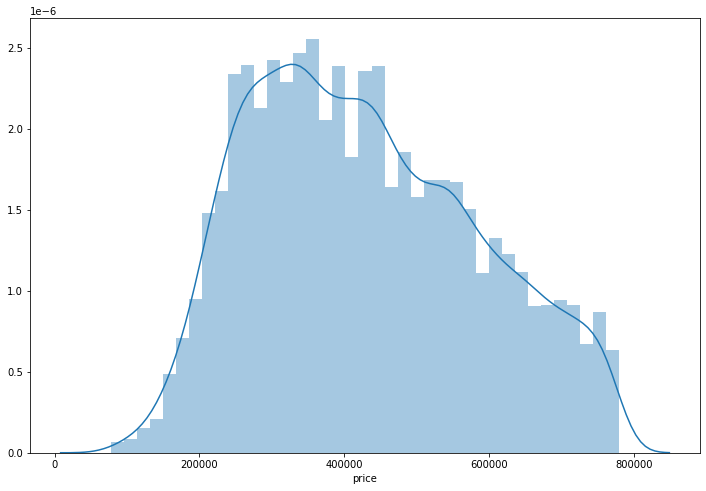

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

In [15]:
df.sort_values('price',ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20606,6666830390,7/18/2014,779380.0,5,2.50,2590,7084,2.0,0,0,3,8,2590,0,2014,0,98052,47.7053,-122.113,3010,4823
2725,5071401000,8/29/2014,779000.0,6,2.50,3250,12000,1.0,0,1,3,8,1800,1450,1966,0,98115,47.6935,-122.280,3490,10320
5374,269000221,8/26/2014,779000.0,3,1.75,2320,6400,1.0,0,2,4,8,1420,900,1957,0,98199,47.6449,-122.389,2540,7680
15663,3956900480,9/3/2014,779000.0,3,1.75,1990,5600,1.0,0,1,3,8,1330,660,1941,0,98199,47.6500,-122.415,2630,6780
21379,3879900754,9/15/2014,779000.0,3,2.50,1580,1487,3.0,0,1,3,9,1580,0,2009,0,98119,47.6276,-122.359,1610,1297


In [16]:
df['price'].median()

411000.0

In [17]:
df['price'].mean()

428690.395870785

# Feature Engineering pour la Date

In [0]:
df = df.drop('id',axis=1)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)
X = df.drop('price',axis=1).values
y = df['price'].values

# Mise à l'échelle et Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Création d'un modèle

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(19, ))) # Hidden 1
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
431/431 - 1s - loss: 45774864384.0000 - val_loss: 11134758912.0000
Epoch 2/1000
431/431 - 1s - loss: 9804494848.0000 - val_loss: 9150687232.0000
Epoch 3/1000
431/431 - 1s - loss: 9123666944.0000 - val_loss: 8816347136.0000
Epoch 4/1000
431/431 - 1s - loss: 8827695104.0000 - val_loss: 8904527872.0000
Epoch 5/1000
431/431 - 1s - loss: 8571733504.0000 - val_loss: 8344147968.0000
Epoch 6/1000
431/431 - 1s - loss: 8378926080.0000 - val_loss: 7977110016.0000
Epoch 7/1000
431/431 - 1s - loss: 7878423040.0000 - val_loss: 7666544128.0000
Epoch 8/1000
431/431 - 1s - loss: 7573588992.0000 - val_loss: 7441919488.0000
Epoch 9/1000
431/431 - 1s - loss: 7220720128.0000 - val_loss: 6985637376.0000
Epoch 10/1000
431/431 - 1s - loss: 7063335424.0000 - val_loss: 7538326016.0000
Epoch 11/1000
431/431 - 1s - loss: 6657574400.0000 - val_loss: 6506193920.0000
Epoch 12/1000
431/431 - 1s - loss: 6486465536.0000 - val_loss: 6314012672.0000
Epoch 13/1000
431/431 - 1s - loss: 6178854400.0000 - val_lo

<Figure size 864x576 with 0 Axes>

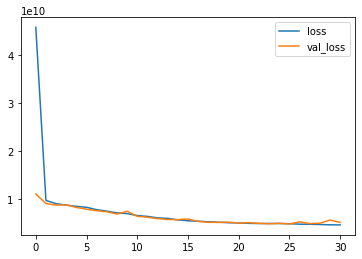

In [22]:
plt.figure(figsize=(12,8))
losses = pd.DataFrame(model.history.history)
losses.plot()

# Évaluation sur les données de test

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

predictions = model.predict(X_test)

MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(mean_squared_error(y_test,predictions))
MAE = mean_absolute_error(y_test,predictions)
EVS = explained_variance_score(y_test,predictions)
print("MSE : {}".format(MSE))
print("RMSE : {}".format(RMSE))
print("MAE : {}".format(MAE))
print("EVS : {}".format(EVS))

MSE : 4903224152.139992
RMSE : 70023.0258710661
MAE : 51198.99874387255
EVS : 0.7983372437884063


In [0]:
def chart_regression(pred, y, sort=True):
    plt.figure(figsize=(12,8))
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True) 
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.plot(t['y'].tolist(), label='expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

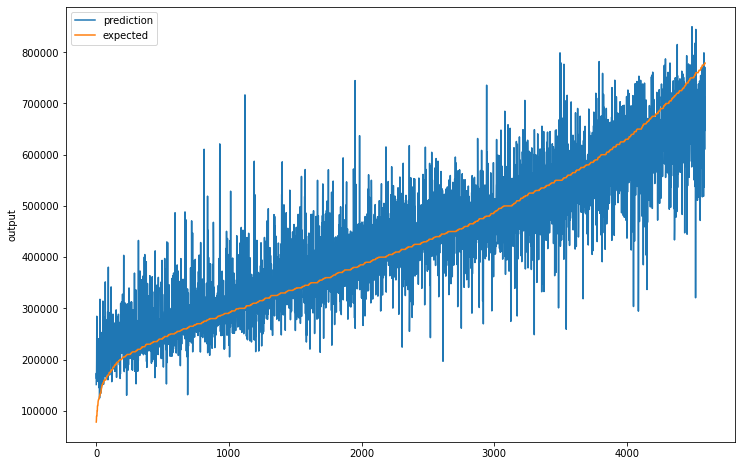

In [25]:
chart_regression(predictions.flatten(),y_test)

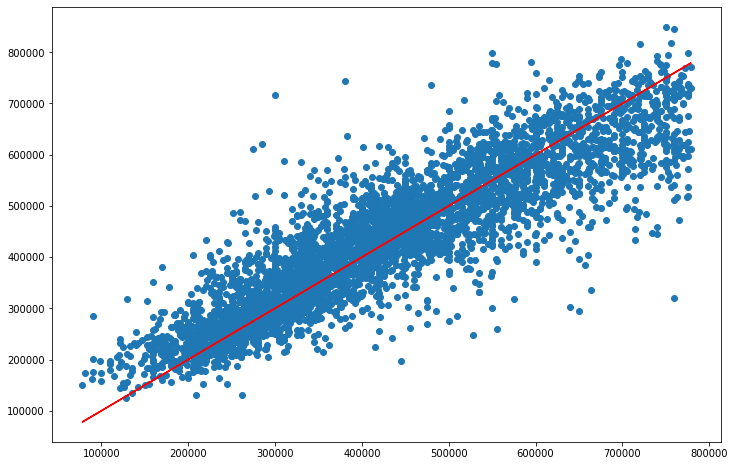

In [26]:
plt.figure(figsize=(12,8))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [27]:
df.shape

(18357, 20)

In [28]:
df['price'].mean()

428690.395870785

In [29]:
df['price'].median()

411000.0